# Mourinho Team Results

The purpose of this notebook is to gather and organize the team results for Jose Mourino's teams throughout his career so we can compare them with his press conferences

In [297]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
%matplotlib inline

## Full Season League Data

In [298]:
chelsea1 = pd.read_csv('Results/2004-2005 (Chelsea).csv')
chelsea2 = pd.read_csv('Results/2005-2006 (Chelsea).csv')
chelsea3 = pd.read_csv('Results/2006-2007 (Chelsea).csv')
chelsea4 = pd.read_csv('Results/2013-2014 (Chelsea).csv')
chelsea5 = pd.read_csv('Results/2014-2015 (Chelsea).csv')

inter1 = pd.read_csv('Results/2008-2009 (Inter).csv')
inter2 = pd.read_csv('Results/2009-2010 (Inter).csv')

rm1 = pd.read_csv('Results/2010-2011 (RM).csv')
rm2 = pd.read_csv('Results/2011-2012 (RM).csv')
rm3 = pd.read_csv('Results/2012-2013 (RM).csv')

manu1 = pd.read_csv('Results/2016-2017 (Man U).csv')
manu2 = pd.read_csv('Results/2017-2018 (Man U).csv')
manu3 = pd.read_csv('Results/2018-2019 (Man U).csv')


In [299]:
chelsea = pd.concat([chelsea1,chelsea2,chelsea3,chelsea4,chelsea5])
chelsea = chelsea[['AwayTeam','HomeTeam','FTHG','FTAG','FTR','Referee','Date']]
chelsea = chelsea.loc[(chelsea['AwayTeam'] == 'Chelsea') | (chelsea['HomeTeam'] == 'Chelsea')]
chelsea['Mourinho Team'] = 'Chelsea'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [300]:
inter = pd.concat([inter1,inter2])
inter = inter[['AwayTeam','HomeTeam','FTHG','FTAG','FTR','Date']]
inter = inter.loc[(inter['AwayTeam'] == 'Inter') | (inter['HomeTeam'] == 'Inter')]
inter['Mourinho Team'] = 'Inter'

In [301]:
manu = pd.concat([manu1,manu2,manu3])
manu = manu[['AwayTeam','HomeTeam','FTHG','FTAG','FTR','Referee','Date']]
manu = manu.loc[(manu['AwayTeam'] == 'Man United') | (manu['HomeTeam'] == 'Man United')]
manu['Mourinho Team'] = 'Man United'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [302]:
rm = pd.concat([rm1,rm2])
rm = rm[['AwayTeam','HomeTeam','FTHG','FTAG','FTR','Date']]
rm = rm.loc[(rm['AwayTeam'] == 'Real Madrid') | (rm['HomeTeam'] == 'Real Madrid')]
rm['Mourinho Team'] = 'Real Madrid'

## Partial Seasons (He was fired before season end)

In [303]:
chelsea_round1 = pd.read_csv('Results/2007-2008 (Chelsea beginning only).csv')
chelsea_round1 = chelsea_round1[['AwayTeam','HomeTeam','FTHG','FTAG','FTR','Referee','Date']]
chelsea_round1 = chelsea_round1.loc[(chelsea_round1['AwayTeam'] == 'Chelsea') | (chelsea_round1['HomeTeam'] == 'Chelsea')]
chelsea_round1['Mourinho Team'] = 'Chelsea'

In [304]:
chelsea_round1=chelsea_round1.iloc[0:6]

In [305]:
chelsea_round2 = pd.read_csv('Results/2015-2016 (Chelsea half).csv')
chelsea_round2 = chelsea_round2[['AwayTeam','HomeTeam','FTHG','FTAG','FTR','Referee','Date']]
chelsea_round2 = chelsea_round2.loc[(chelsea_round2['AwayTeam'] == 'Chelsea') | (chelsea_round2['HomeTeam'] == 'Chelsea')]
chelsea_round2['Mourinho Team'] = 'Chelsea'

In [306]:
chelsea_round2=chelsea_round2.iloc[0:16]
#chelsea_round2

In [307]:
chelsea=pd.concat([chelsea,chelsea_round1, chelsea_round2])

## Put it all together

In [308]:
chelsea.head()

,AwayTeam,HomeTeam,FTHG,FTAG,FTR,Referee,Date,Mourinho Team
8,Man United,Chelsea,1.0,0.0,H,G Poll,15/08/04,Chelsea
10,Chelsea,Birmingham,0.0,1.0,A,B Knight,21/08/04,Chelsea
21,Chelsea,Crystal Palace,0.0,2.0,A,C Foy,24/08/04,Chelsea
30,Southampton,Chelsea,2.0,1.0,H,S Bennett,28/08/04,Chelsea
39,Chelsea,Aston Villa,0.0,0.0,D,R Styles,11/09/04,Chelsea


In [309]:
chelsea['Result']=chelsea.apply(lambda x: 'Win' if (x['FTR']=='H' and x['HomeTeam']=='Chelsea') or (x['FTR']=='A' and x['AwayTeam']=='Chelsea')
                                else 'Draw' if x['FTR']=='D'
                                else 'Loss',axis='columns')

In [310]:
inter['Result']=inter.apply(lambda x: 'Win' if (x['FTR']=='H' and x['HomeTeam']=='Inter') or (x['FTR']=='A' and x['AwayTeam']=='Inter')
                                else 'Draw' if x['FTR']=='D'
                                else 'Loss',axis='columns')

In [311]:
rm['Result']=rm.apply(lambda x: 'Win' if (x['FTR']=='H' and x['HomeTeam']=='Real Madrid') or (x['FTR']=='A' and x['AwayTeam']=='Real Madrid')
                                else 'Draw' if x['FTR']=='D'
                                else 'Loss',axis='columns')

In [312]:
manu['Result']=manu.apply(lambda x: 'Win' if (x['FTR']=='H' and x['HomeTeam']=='Man United') or (x['FTR']=='A' and x['AwayTeam']=='Man United')
                                else 'Draw' if x['FTR']=='D'
                                else 'Loss',axis='columns')

In [313]:
final = pd.concat([chelsea,rm,inter,manu])
final['Date']=pd.to_datetime(final['Date'], format='%d/%m/%y')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [314]:
#final

## Champions League

In [315]:
englandcl = pd.read_csv('Results/England_CL.csv')
englandcl.columns=['None','Round','Date','Time','Home/Away','None','Opponent','Score','None']
englandcl=englandcl[['Date','Opponent','Score','Round']]
englandcl = englandcl.dropna()
englandcl=englandcl[englandcl['Score'].str.contains(":")]
englandcl['Score'] = englandcl['Score'].str[:4]
englandcl['Result'] = englandcl['Score'].apply(lambda x: 'Win' if int(x[0])>int(x[2])
                                               else 'Draw' if int(x[0])==int(x[2])
                                                else 'Loss')
englandcl['Date']=pd.to_datetime(englandcl['Date'],format='%d/%m/%Y')
datetime_object = datetime.strptime('Jan 1 2016', '%b %d %Y')
englandcl['Mourinho Team']=np.where(englandcl['Date']<datetime_object, 'Chelsea', 'Man United')

In [316]:
italycl = pd.read_csv('Results/Italy_CL.csv')
italycl.columns=['None','Round','Date','Time','Home/Away','None','Opponent','Score','None']
italycl=italycl[['Date','Opponent','Score','Round']]
italycl = italycl.dropna()
italycl=italycl[italycl['Score'].str.contains(":")]
italycl['Score'] = italycl['Score'].str[:4]
italycl['Result'] = italycl['Score'].apply(lambda x: 'Win' if int(x[0])>int(x[2])
                                               else 'Draw' if int(x[0])==int(x[2])
                                                else 'Loss')
italycl['Date']=pd.to_datetime(italycl['Date'],format='%d/%m/%Y')
italycl['Mourinho Team']='Inter'

In [317]:
spaincl = pd.read_csv('Results/Spain_CL.csv')
spaincl.columns=['None','Round','Date','Time','Home/Away','None','Opponent','Score']
spaincl=spaincl[['Date','Opponent','Score','Round']]
spaincl = spaincl.dropna()
spaincl=spaincl[spaincl['Score'].str.contains(":")]
spaincl['Score'] = spaincl['Score'].str[:4]
spaincl['Result'] = spaincl['Score'].apply(lambda x: 'Win' if int(x[0])>int(x[2])
                                              else 'Draw' if int(x[0])==int(x[2])
                                               else 'Loss')
spaincl['Date']=pd.to_datetime(spaincl['Date'],format='%d/%m/%Y')
spaincl['Mourinho Team']='Real Madrid'

In [318]:
cl = pd.concat([spaincl,italycl,englandcl])

In [319]:
respect = pd.concat([final,cl])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [320]:
respect
respect['Num_Result']=respect.apply(lambda x: 1 if x['Result']=='Win'
                                else 0 if x['Result']=='Draw'
                                else -1,axis='columns')

In [321]:
respect['Team Color'] = respect['Mourinho Team'].apply(lambda x: 'blue' if x=='Chelsea'
                                                       else 'black' if x=='Inter'
                                                       else 'red' if x=='Man United'
                                                       else 'white')

In [322]:
respect.head()

,AwayTeam,Date,FTAG,FTHG,FTR,HomeTeam,Mourinho Team,Opponent,Referee,Result,Round,Score,Num_Result,Team Color
8,Man United,2004-08-15,0.0,1.0,H,Chelsea,Chelsea,NaN,G Poll,Win,NaN,NaN,1,blue
10,Chelsea,2004-08-21,1.0,0.0,A,Birmingham,Chelsea,NaN,B Knight,Win,NaN,NaN,1,blue
21,Chelsea,2004-08-24,2.0,0.0,A,Crystal Palace,Chelsea,NaN,C Foy,Win,NaN,NaN,1,blue
30,Southampton,2004-08-28,1.0,2.0,H,Chelsea,Chelsea,NaN,S Bennett,Win,NaN,NaN,1,blue
39,Chelsea,2004-09-11,0.0,0.0,D,Aston Villa,Chelsea,NaN,R Styles,Draw,NaN,NaN,0,blue


Visualize to make sure the data is accurate

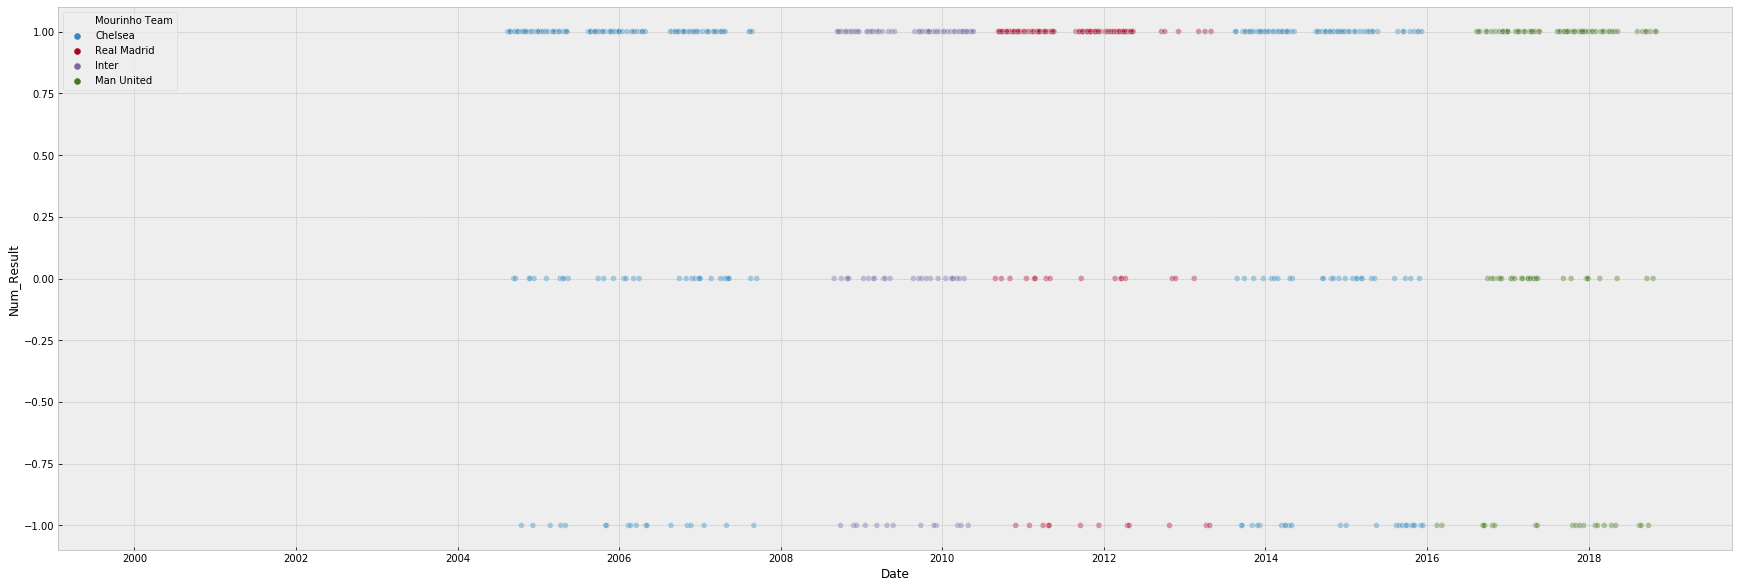

In [330]:
plt.figure(figsize=(30,10))
#labels = np.random.randint(0,3, size = 10)
#sns.plot(respect['Date'],respect['Num_Result'])


sns.scatterplot(x="Date", y="Num_Result", hue='Mourinho Team', data=respect,alpha=.4)


In [324]:
manu['Num_Result']=manu.apply(lambda x: 1 if x['Result']=='Win'
                                else 0 if x['Result']=='Draw'
                                else -1,axis='columns')

In [327]:
import pickle

filename = 'Data/results_df.pkl'
pickle.dump(respect, open(filename, 'wb'))